In [1]:
# https://cran.r-project.org/web/packages/NNS/vignettes/NNSvignette_Clustering_and_Regression.html

import rpy2                                       # https://rpy2.readthedocs.io/en/latest/
from rpy2 import robjects
from rpy2.robjects import Formula, Environment
from rpy2.robjects.vectors import DataFrame, IntVector, FloatVector
from rpy2.robjects.packages import importr, data
from rpy2.robjects.lib import grid
from rpy2.rinterface import RRuntimeWarning
import warnings


In [9]:
# https://stackoverflow.com/questions/43110228/how-to-plot-inline-with-rpy2-in-jupyter-notebook
from contextlib import contextmanager
from rpy2.robjects.lib import grdevices
from IPython.display import Image, display

@contextmanager
def r_inline_plot(width=600, height=600, dpi=100):
    with grdevices.render_to_bytesio(grdevices.png, width=width, height=height, res=dpi) as b:
        yield
    data = b.getvalue()
    display(Image(data=data, format='png', embed=True))

In [3]:
r_base = importr('base')
r_NNS = importr('NNS')                #require(NNS)   -> TODO: install R package automoatically: https://rpy2.readthedocs.io/en/latest/introduction.html#getting-started
r_knitr = importr('knitr')            #require(knitr)
r_rgl = importr('rgl')                #require(rgl)
r_data_table =importr('data.table')   #require(data.table)
r_dtw = importr('dtw')                #require(dtw)
r_grdevices = importr('grDevices')
r_print = robjects.r("print")
grid.activate()

In [4]:
x = rpy2.robjects.r("x = seq(-5, 5, .05)")
y = rpy2.robjects.r("y = x ^ 3")

In [5]:
x

-5.000000,-4.950000,-4.900000,...,4.900000,4.950000,5.000000


In [6]:
y

-125.000000,-121.287375,-117.649000,...,117.649000,121.287375,125.000000


----------------------------------
FOR:  1


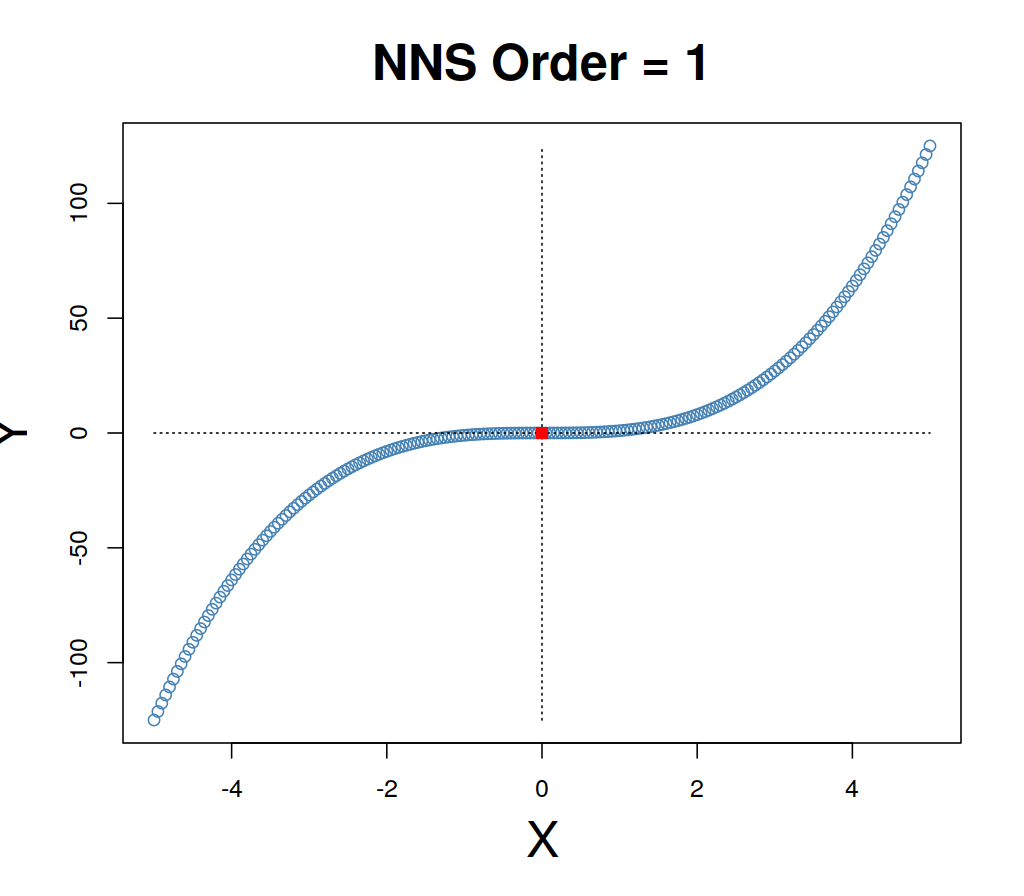

$order
[1] 1

$dt
         x         y quadrant prior.quadrant
  1: -5.00 -125.0000       q4              q
  2: -4.95 -121.2874       q4              q
  3: -4.90 -117.6490       q4              q
  4: -4.85 -114.0841       q4              q
  5: -4.80 -110.5920       q4              q
 ---                                        
197:  4.80  110.5920       q1              q
198:  4.85  114.0841       q1              q
199:  4.90  117.6490       q1              q
200:  4.95  121.2874       q1              q
201:  5.00  125.0000       q1              q

$regression.points
   quadrant            x            y
1:        q 1.767519e-17 7.635683e-15

----------------------------------
----------------------------------
FOR:  2


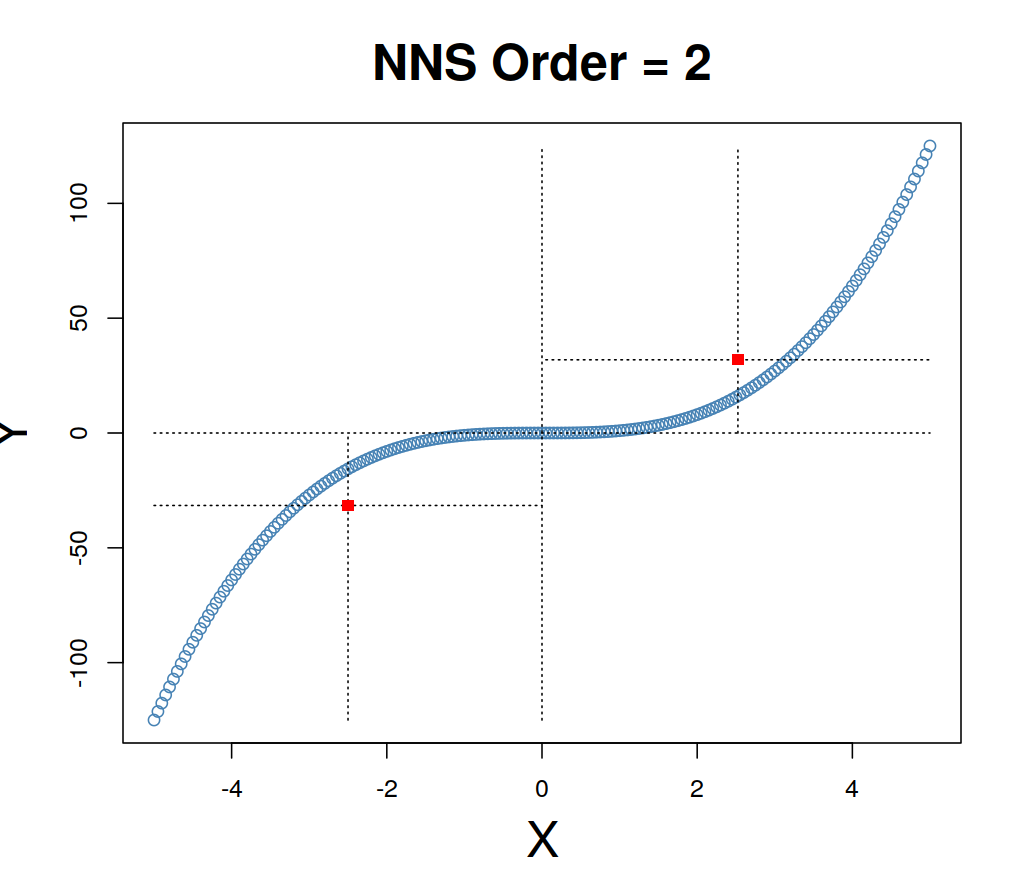

$order
[1] 2

$dt
         x         y quadrant prior.quadrant
  1: -5.00 -125.0000      q44             q4
  2: -4.95 -121.2874      q44             q4
  3: -4.90 -117.6490      q44             q4
  4: -4.85 -114.0841      q44             q4
  5: -4.80 -110.5920      q44             q4
 ---                                        
197:  4.80  110.5920      q11             q1
198:  4.85  114.0841      q11             q1
199:  4.90  117.6490      q11             q1
200:  4.95  121.2874      q11             q1
201:  5.00  125.0000      q11             q1

$regression.points
   quadrant      x         y
1:       q1  2.525  31.87813
2:       q4 -2.500 -31.56250

----------------------------------
----------------------------------
FOR:  3


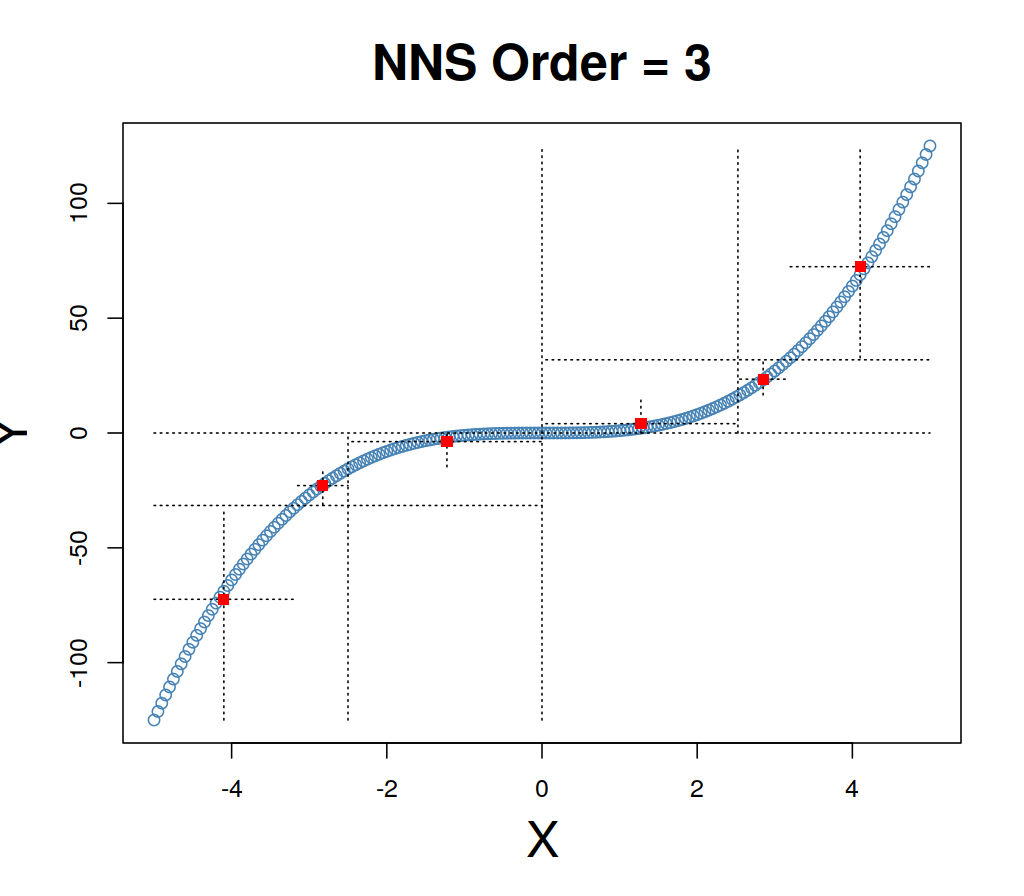

$order
[1] 3

$dt
         x         y quadrant prior.quadrant
  1: -5.00 -125.0000     q444            q44
  2: -4.95 -121.2874     q444            q44
  3: -4.90 -117.6490     q444            q44
  4: -4.85 -114.0841     q444            q44
  5: -4.80 -110.5920     q444            q44
 ---                                        
197:  4.80  110.5920     q111            q11
198:  4.85  114.0841     q111            q11
199:  4.90  117.6490     q111            q11
200:  4.95  121.2874     q111            q11
201:  5.00  125.0000     q111            q11

$regression.points
   quadrant      x          y
1:      q11  4.100  72.426500
2:      q13  2.850  23.448375
3:      q14  1.275   4.064063
4:      q41 -1.225  -3.751562
5:      q42 -2.825 -22.889562
6:      q44 -4.100 -72.426500

----------------------------------
----------------------------------
FOR:  4


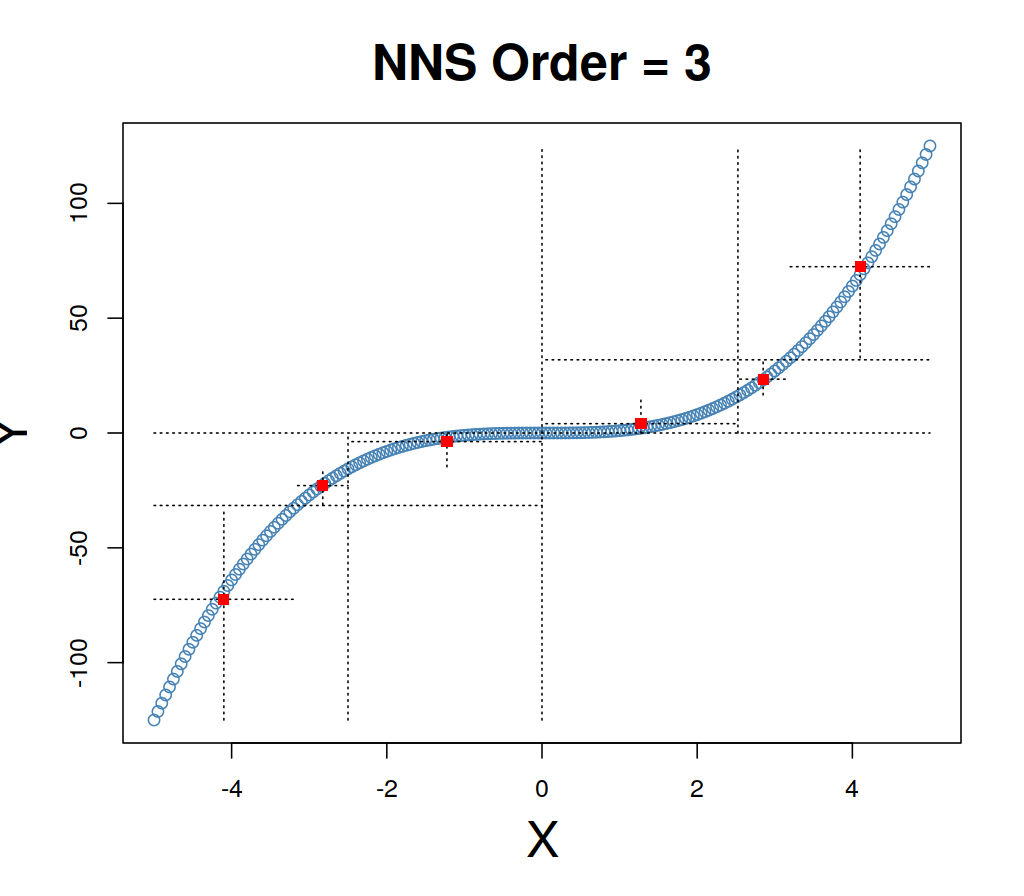

$order
[1] 3

$dt
         x         y quadrant prior.quadrant
  1: -5.00 -125.0000     q444            q44
  2: -4.95 -121.2874     q444            q44
  3: -4.90 -117.6490     q444            q44
  4: -4.85 -114.0841     q444            q44
  5: -4.80 -110.5920     q444            q44
 ---                                        
197:  4.80  110.5920     q111            q11
198:  4.85  114.0841     q111            q11
199:  4.90  117.6490     q111            q11
200:  4.95  121.2874     q111            q11
201:  5.00  125.0000     q111            q11

$regression.points
   quadrant      x          y
1:      q11  4.100  72.426500
2:      q13  2.850  23.448375
3:      q14  1.275   4.064063
4:      q41 -1.225  -3.751562
5:      q42 -2.825 -22.889562
6:      q44 -4.100 -72.426500

----------------------------------


In [11]:
for i in [1,2,3,4]:
    print("----------------------------------")
    print("FOR: ", i)
    ret = None
    with r_inline_plot(width=1024, height=896, dpi=150):
        ret = r_NNS.NNS_part(x, y, order=i, min_obs_stop=False, Voronoi=True)
    r_print(ret)
    print("----------------------------------")